# CSCI 4580/5580 - Data Science – Fall 2020
## Lab 9: Unsupervised Learning

#### **Student Full Name**: Sharvita Paithankar

#### **Student ID**: 108172438


### Before you Begin:
As with Lab 8, this lab will require using the `tensorflow` deep learning library. In the previous lab, you created a virtual environment called `tf` that contained tensorflow and some dependencies.

For this lab, we will also need some new dependencies. Follow the steps below to install the new dependencies to your `tf` conda environment.

First, activate your `tf` environment using `conda activate tf`.

![Activate conda tf environment](imgs/activate_tf.png)

This lab requires two new dependencies: 
* `seaborn` - A plotting library built on `matplotlib`.
* `scikit-learn` - The scikit-learn packages. We have used this package before, but not from the `tf` environment.

You can install both dependencies with a single line of code:

![install packages](imgs/install_packages.png)

Finally, run `jupyter notebook` or `jupyter lab` to proceed with the assignment.

![run jupyter](imgs/run_jupyter.png)

### Deliverables
Complete all the exercises below and turn in a write up in the form of a Jupyuter notebook, that is, an **.ipynb file**.
The write up should include your code, answers to exercise questions, and plots of results.
Submit the assignment on Canvas under "Lab 9", with this file (after your edits) as an attachment. 

Notes:

1. You have to use this notebook and fill in answers inline. 

2. Please do not add or remove any cells (you can add cells while doing the homework but remove them before submission).

3. In this notebook, we provide code templates for many of the exercises. They are intended to help with code re-use, since the exercises build on each other. Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

4. We will test your code automatically, so in your submitted notebook function names must conform with the names requested by the questions. Also you should make sure we can execute your notebook by running "Cell > Run all".

### Need Help? 
In case you need help with this assignment, please ask your questions on the designated channel for Lab 9 on Microsoft Teams. This way, you may receive assistance from the TA’s or your classmates (<b>DO NOT share your solution</b>) [Recommended]. 
<br/>If you need to include your solution in your question, please create a new chat with <b>all the TA’s</b>. In the new chat, add all the TA’s rather than sending your question to the TA’s separately.

### Collaboration
This assignment is to be done individually. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use resources on the Internet to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

Let's Get Started!
===

## Overview
Unsupervised learning is the process of learning about the structure and relationships between samples in a dataset without the use of any ground truth labels. Unlike supervised learning models which require knowledge of the class structure of the data, unsupervised learning models are capable of learning directly from the data itself, without any class labels.

One of the most common methods for unsupervised learning is called "clustering". Clustering is the process of parititoning a dataset into groups. Samples within each group or "cluster" are similar to each other in some respect. In a typical "hard" clustering, each sample belongs to a single cluster (i.e. Samples can not belong to more than one cluster). However, there are "soft" clustering algorithms which can allow for samples to belong to multiple clusters at once.

## Application
In Parts 1 and 2 of this lab, we will apply two well-known clustering algorithms to cluster a dataset containing different types of cars. For each car, the dataset records different measurements such as:
* MPG (Miles per-gallon)
* Displacemenet
* Horsepower
* Weight
* Acceleration

In particular, we will apply the following two *unsupervised* clustering algorithms to this dataset:
* K-Means
* Agglomerative Clustering

and evaluate how well these algorithms are capable of detecting the underlying class structure in the data.

### Files

Data files for this assignment are provided in the `Data` folder inside the ZIP archive.

`Data/` includes the following files:

* **auto-mpg.data-original**, Data for the "Auto MPG" dataset.
* **train.fmat.txt**, Data from the MNIST digit dataset.
* **ictrain.imat.txt**, Labels for the MNIST digit dataset.


In [145]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

## Q1 [10 points]
Load the file `auto-mpg.data` into a Pandas DataFrame called `data`.

This dataset does have a few quirks:

First, the dataset is whitespace delimited, you can use `pd.read_csv`'s `delim_whitespace` argument to handle this.

Second, the missing values are encoded with a question mark `?`. To handle this, you can use the `na_values` argument from `pd.read_csv`. 

**NOTE:** Refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for the full documentation of `pd.read_csv`.

In [146]:
columns = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
data = pd.read_csv("auto-mpg.data", header=None,names=columns, delim_whitespace=True, na_values = "?") 
print(data.head(60))

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0   18.0          8         307.0       130.0  3504.0          12.0   
1   15.0          8         350.0       165.0  3693.0          11.5   
2   18.0          8         318.0       150.0  3436.0          11.0   
3   16.0          8         304.0       150.0  3433.0          12.0   
4   17.0          8         302.0       140.0  3449.0          10.5   
5   15.0          8         429.0       198.0  4341.0          10.0   
6   14.0          8         454.0       220.0  4354.0           9.0   
7   14.0          8         440.0       215.0  4312.0           8.5   
8   14.0          8         455.0       225.0  4425.0          10.0   
9   15.0          8         390.0       190.0  3850.0           8.5   
10  15.0          8         383.0       170.0  3563.0          10.0   
11  14.0          8         340.0       160.0  3609.0           8.0   
12  15.0          8         400.0       150.0  3761.0           9.5   
13  14

## Q2 [5 points]

For our experiments, we will only use a subset of this data.

Subset `data` to use only the following 3 columns:
* `horsepower`
* `weight` 
* `acceleration`

In [147]:
data = data[["horsepower", "weight", "acceleration" ]]
print(data)

     horsepower  weight  acceleration
0         130.0  3504.0          12.0
1         165.0  3693.0          11.5
2         150.0  3436.0          11.0
3         150.0  3433.0          12.0
4         140.0  3449.0          10.5
..          ...     ...           ...
393        86.0  2790.0          15.6
394        52.0  2130.0          24.6
395        84.0  2295.0          11.6
396        79.0  2625.0          18.6
397        82.0  2720.0          19.4

[398 rows x 3 columns]


## Q3 [5 points]

We will not be able to use samples that have missing values for one or more of the columns.

Drop **any** rows in `data` which have **one or more** missing values.

**HINT:** [Documentation for DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [148]:
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(data.head(35))

    horsepower  weight  acceleration
0        130.0  3504.0          12.0
1        165.0  3693.0          11.5
2        150.0  3436.0          11.0
3        150.0  3433.0          12.0
4        140.0  3449.0          10.5
5        198.0  4341.0          10.0
6        220.0  4354.0           9.0
7        215.0  4312.0           8.5
8        225.0  4425.0          10.0
9        190.0  3850.0           8.5
10       170.0  3563.0          10.0
11       160.0  3609.0           8.0
12       150.0  3761.0           9.5
13       225.0  3086.0          10.0
14        95.0  2372.0          15.0
15        95.0  2833.0          15.5
16        97.0  2774.0          15.5
17        85.0  2587.0          16.0
18        88.0  2130.0          14.5
19        46.0  1835.0          20.5
20        87.0  2672.0          17.5
21        90.0  2430.0          14.5
22        95.0  2375.0          17.5
23       113.0  2234.0          12.5
24        90.0  2648.0          15.0
25       215.0  4615.0          14.0
2

## Q4 [5 points]
Since these variables are on different scales (`weight` values are much larger than values for `horsepower` or `acceleration`), we need to normalize each column.

Use the `StandardScaler` object from `scikit-learn` to normalize each column of `data`.

[StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

**NOTE:** When you are finished, make sure that `data` is still a DataFrame! 

In [149]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
print(data)

[[ 0.66413273  0.62054034 -1.285258  ]
 [ 1.57459447  0.84333403 -1.46672362]
 [ 1.18439658  0.54038176 -1.64818924]
 ...
 [-0.53247413 -0.80463202 -1.4304305 ]
 [-0.66254009 -0.41562716  1.11008813]
 [-0.58450051 -0.30364091  1.40043312]]


# Part 1: $k$-means Clustering

The $k$-means algorithm is a popular and relatively simple algorithm for clustering. To initialize the algorithm, the user must first specify $k$ which represents the number of clusters to be generated. Once $k$ is chosen, the algorithm will intialize $k$ centroids, which will represent the centers of the $k$ clusters. 

### $k$-means algorithm:
1. For each sample, calculate the distance between that sample and **each** of the $k$ centroids.
2. Assign each of the samples the "label" of the *nearest* centroid.
3. Update each of the $k$ centroids by setting it equal to the the **mean** of the samples which have that centroid's label. 

This process is performed iteratively until some stopping criteria is met. 

The below figure shows an example of a $k$-means clustering for $k=3$.

![k-means clustering](imgs/k-means.gif)
*Image Credit: [Wikipedia Commons](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)*

## Determining the Best $k$:
The $k$-means algorithm requires that the user choose $k$, the number of cluster centroids. However, this causes a chicken-and-egg problem! If we are trying to perform *unsupervised* learning we **don't know** how many clusters we should use in the first place! We can try clustering with multiple values for $k$, but we need a way to pick the best $k$ out of the candidates that we try.

In order to find the $k$ that most agrees with the data, we will use a metric known as Silhouette Score.

## Silhouette Score
Silhouette Score is a metric that may be used to measure how well a set of cluster labels "agree" with the distribution of the data.

Silhouette is defined by three equations:

$$ a(i) = \frac{1}{|C_i| - 1}\sum_{j \in C_i,i\neq j}{d(i,j)} $$

$$ b(i) = \min_{k \neq i} \frac{1}{|C_k|} \sum_{j \in C_k}{d(i,j)}$$

$$ s(i) = \frac{b(i) - a(i)}{\max{\{a(i),b(i)\}}} $$

* The first equation $a(i)$ calculates the average distance from sample $i$ to all other points within the same cluster as $i$.
* The second equation $b(i)$ calculates the average distance from sample $i$ to the points in the second-closest cluster to $i$. 
* The third equation $s(i)$ combines $a(i)$ and $b(i)$ into a single metric.

Intuitively, $a(i)$ measures how close sample $i$ is to the other points in the same cluster. Low values for $i$ indicate that the $i$ is very close to the other points in the cluster, indicating that the cluster is dense.

$b(i)$ measures the distance between $i$'s "home" cluster and the second-closest cluster to $i$. If this value is large, than $i$ is well-clustered, since it is much closer to points within its own cluster than to points in the second closest cluster. 

$s(i)$ arranges $a(i)$ and $b(i)$ into a normalized term in the interval $[-1,1]$. A value of $s(i) \approx 1$, indicates a "good" clustering for $i$, since $s(i)$ will be close to one when:
* $a(i)$ is small ($i$ is close to its neighbor points)

and/or
* $b(i)$ is large ($i$ is well-separated from the neighboring cluster). 

Similarly, a value of $s(i) \approx -1$ indicates the *worst possible clustering* for $i$, since either:
* $a(i)$ is very big ($i$ is not close to its neighbors)

and/or
* $b(i)$ is very small ($i$ is very close to a neighboring cluster).

The Silhouette coefficient $s(i)$ shown above is calculated once for each sample being clustered. Taking the average of $s(i)$ for all clustered samples will give an overall measure of cluster "agreement" with the data. 

In the next section, we will perform multiple $k$-means clustering operations, and evaluate each one using the Silhouette coefficient.

In [150]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

We can create a $k$-means model using `KMeans` from `scikit-learn`.

In [151]:
km_obj = KMeans(n_clusters=5)

Using the `km_obj` model we created above, we can fit the model and then retrieve the cluster labeling for each sample using the `fit_predict` method of `km_obj`.

In [152]:
labels = km_obj.fit_predict(data)
labels.shape

(392,)

## Q5 [15 points]

For $k = [2,15]$, fit a $k$-means model with $k$ centroids.

Record the labels provided by $k$-means in the dictionary `labels_k`, such that `labels_k[i]` holds the array of labels returned from the $k$-means fit with $i$ centroids.

Your `labels_k` dictionary should look something like this:

```
{2: array([...]),
 3: array([...]),
 ...
 15: array([...])}
```

Where each `array([...])` contains a set of $k$-means labels.

In [153]:
labels_k = dict()
# TODO: Answer Q5
for i in range(2, 16):
    km_obj = KMeans(n_clusters = i)
    labels_k[i] = km_obj.fit_predict(data)

In the example above, we created a $k$-means fit with $k=5$ and stored the resulting labeling in `labels`. To calculate the average Silhouette coefficient for our entire dataset, we can use the `silhouette_score` function from `scikit-learn`.

`silhouette_score` expects to be called like `silhouette_score(data,labels)`.

In [154]:
print("Silhouette score for K=5: %0.3f" % silhouette_score(data,labels))
sil_score = silhouette_score(data,labels)
print(sil_score)

Silhouette score for K=5: 0.358
0.35792807712116814


## Q6 [15 points]

Great! Now that we have a set of $k$-means labelings for $k = [2,15]$, we can evaluate each one using `silhouette_score` to obtain the "best" fitting $k$ for our model.

We will use the `labels_k` dictionary you created above to plot the Silhouette score for each $k$.

### 6.1:
Create a line plot which has $k$ on the X-axis, and the calculated Silhouette score on the Y-axis (refer to the above cell for how to calculate Silhouette score given a set of labels).

The plot should show a line along with markers at each point. 

Be sure to label your axes and give the chart a title!

### 6.2:
Based on what we saw with Silhouette coefficient in the previous section, which value of $k$ provides the "best" (as defined by silhouette score) agreement between the clusters and the data?

Text(0, 0.5, 'Silhouette_score')

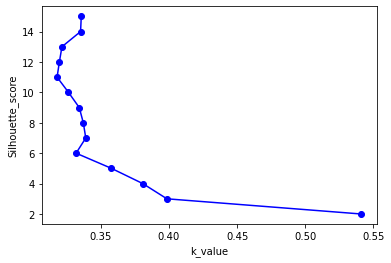

In [155]:
# TODO:
# Answer 6.1 here.
y_ax = []
x_ax=[]
for x in range(2,16,1):
    y_ax.append(x)
    x_ax.append(silhouette_score(data,labels_k[x]))
plt.plot(x_ax, y_ax, marker ='o', color='b')
plt.xlabel('k_value')
plt.ylabel('Silhouette_score')

In [156]:
# TODO:
# Answer 6.2 here.
#k=2 (silhouette score is 0.57116) is the best silhouette score obtained. 

Now let's visualize some of these clustering results. 

We can use the `pairplot` function from the `seaborn` library to produce a grid of scatter plots between each pair of variables.

The `plot_kws={"s":10}` argument sets the size of the points in the scatter plot to be `10`. This is because sometimes larger point sizes can make it difficult to see separation between groups. You may change this to be larger or smaller if you wish.

In [157]:
import seaborn as sns

In [ ]:
v_data = data.copy()
sns.pairplot(v_data,plot_kws={"s":10})

Using the `hue` argument to `pairplot`, we can select one of the columns to be the color for the plot. This is handy for visualizing clustering results.

First, let's visualize the clustering result for $k=2$.

In [ ]:
VIS_K = 2
v_data["labels"] = labels_k[VIS_K]
sns.pairplot(data=v_data,hue="labels",plot_kws={"s":10})

## Q7 [10 points]
In a few sentences, use the above plot to discuss how the clustering algorithm has partitioned our data.

Here are some examples of questions you might discuss in your answer:

* What do the members of each cluster have in common?
* Are there any variables that appear to be important/not important for cluster separation?

You can also try setting the `VIS_K` variable to a different value, to visualize the cluster separation for other values of $k$. 

* What happens to the clusters as you increase the value of $k$?

#TODO: Answer Q7 here. (It was working before and now the code doesnt run. I dont know why?)


What do the members of each cluster have in common?
Both clusters seem to have overlapping density plots at diaglonal grid


Are there any variables that appear to be important/not important for cluster separation?
Weight and horsepower are positively correlated and have a good relationship.
Horsepower and acceleration is negatively correlated but they have a relatively good relationship.
Weight and acceleration do not have a strong relationship. 


What happens to the clusters as you increase the value of  𝑘 k?
When VIS_K value is increased, the number of clusters increase and we can see the distribution based on the k value we chose. 

# Part 2: Agglomerative Clustering (Extra Credit)

## IMPORTANT:
This section (Questions 8, 9, and 10) gives you the opportunity to earn up to 20 extra credit points! This section is optional, so if you do not want the extra credit, just proceed to **Part 3: Autoencoder**.

## Overview:

Agglomerative clustering is a method for bottom-up hierarchical clustering. In Agglomerative clustering, each sample starts in its own "cluster". A distance metric and linkage criterion are used to determine which clusters to merge with each other at each step. Intuitively, pairs of clusters which are very similar to each other may be merged.

Since each sample starts in its own cluster and is merged into larger clusters, the clustering result may be easily visualized as a "tree" of hierarchical clusters. 

![hierarchical clustering result](imgs/hierarchical_cluster.png)
*Image Credit: [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering#/media/File:Hierarchical_clustering_simple_diagram.svg)*

To obtain a clustering result for $k$ clusters, one just needs to cut the "tree" at the appropriate point. 

In the following section, we will also apply Agglomerative clustering as a technique for clustering our auto data.

In [161]:
from sklearn.cluster import AgglomerativeClustering

As with the prior section, we can create a `AgglomerativeClustering` object to perform clustering for us. The `n_clusters` parameter controls the value for number of clusters $k$.

Here we create an `AgglomerativeClustering` object and call it `agg_obj`, then use the `fit_predict` method to fit it and produce a label set for our data.

Finally, we print out the Silhouette score using `silhouette_score`.

In [162]:
agg_obj = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_obj.fit_predict(data)
print("Agglomerative Clustering Silhouette score for K=5: %0.3f" % silhouette_score(data,agg_labels))

Agglomerative Clustering Silhouette score for K=5: 0.329


## Q8 [10 points]

For $k = [2,15]$, fit a Agglomerative Clustering model with $k$ clusters and store the results in the dictionary `agg_labels_k`.

The dictionary entry `agg_labels_k[i]` should hold the array of labels returned from the clustering fit with $i$ clusters.

Your `agg_labels_k` dictionary should look something like this:

```
{2: array([...]),
 3: array([...]),
 ...
 15: array([...])}
```

Where each `array([...])` contains a set of cluster labels.

**NOTE:** You can resue most of your code from Q5!

In [163]:
agg_labels_k = dict()
# TODO: Answer Q8 here.

## Q9 [5 points]

Using your `agg_labels_k` dictionary, create a line plot which has $k$ on the X-axis, and the calculated Silhouette score on the Y-axis (refer to the above cell for how to calculate Silhouette score given a set of labels).

The plot should show a line along with markers at each point. 

Be sure to label your axes and give the chart a title!

In [ ]:
#TODO: Answer Q9 here.

## Q10 [5 points]
How do you think that Agglomerative Clustering performed relative to $k$-means?

Since the clustering algorithms differ in how they perform clustering (centroid-based vs merging pairs of clusters), are there any situations where it might be better to use one algorithm over the other?

In [ ]:
# TODO: Answer Q10 here.

# Part 3: Autoencoder

For high-dimensional datasets, clustering based on raw data may not be optimal due to the curse of dimensionality, which shows that distance comparisons between samples become less meaningful as the dimensionality of the data increases. 

One solution to this is to use a dimensionality reduction technique before applying clustering. 

Autoenocoders are a neural network architecture which may be used to perform dimensionality reduction. These models are trained to reconstruct their inputs from a "constrained" view of the data. The autoencoder must learn features of the data in order to compress the data into a lower dimensional representation.

![Autoencoder](imgs/Autoencoder_structure.png)
*Image Credit: [Wikipedia](https://en.wikipedia.org/wiki/Autoencoder#/media/File:Autoencoder_structure.png)*

In this section we will build a simple autoencoder model and apply it to learn a featurization of the well-known MNIST handwritten digits dataset.

In [124]:
import os
# Required to avoid a kernel crash on MacOS
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow import keras

In this cell we define the Encoder and Decoder portions of our model. Our model will have 2 convolutional layers, each followed by a max-pool layer.

At the end, we flatten the output to create a feature vector of 16 dimensions per-sample (a large reduction from the original 768 dimensions per-sample).

In [125]:
input_layer = keras.layers.Input((28,28,1))
layer_outputs = [input_layer]
# Build Encoder layers
enc_conv_1 = keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation="relu",padding="same",name="enc_conv_1")(input_layer)
enc_mp_1 = keras.layers.MaxPool2D(pool_size=2,name="enc_mp_1")(enc_conv_1)
enc_conv_2 = keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same",name="enc_conv_2")(enc_mp_1)
enc_mp_2 = keras.layers.MaxPool2D(pool_size=2,name="enc_mp_2")(enc_conv_2)
enc_flat = keras.layers.Flatten(name="enc_flat")(enc_mp_2)
enc_dense = keras.layers.Dense(units=16,name="enc_dense")(enc_flat)
# Build Decoder layers
decoder_input = enc_dense
dec_dense = keras.layers.Dense(units=enc_flat.shape[-1],name="dec_dense")(decoder_input)
dec_reshape = keras.layers.Reshape(enc_mp_2.shape[1:],name="dec_reshape")(dec_dense)
dec_upsmp_2 = keras.layers.UpSampling2D(name="dec_upsmp_2")(dec_reshape)
dec_deconv_2 = keras.layers.Conv2DTranspose(filters=16,kernel_size=(3,3),activation="relu",padding="same",name="dec_deconv_2")(dec_upsmp_2)
dec_upsmp_1 = keras.layers.UpSampling2D(name="dec_upsmp_1")(dec_deconv_2)
dec_deconv_1 = keras.layers.Conv2DTranspose(filters=1,kernel_size=(3,3),activation="relu",padding="same",name="dec_deconv_1")(dec_upsmp_1)

Now that we have built all of the individual layers, we create a new `Model` and pass it the inputs `input_layer` and outputs `dec_deconv_1` for our model.

In [126]:
model = keras.Model(inputs=input_layer,outputs=dec_deconv_1)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
enc_conv_1 (Conv2D)          (None, 28, 28, 8)         80        
_________________________________________________________________
enc_mp_1 (MaxPooling2D)      (None, 14, 14, 8)         0         
_________________________________________________________________
enc_conv_2 (Conv2D)          (None, 14, 14, 16)        1168      
_________________________________________________________________
enc_mp_2 (MaxPooling2D)      (None, 7, 7, 16)          0         
_________________________________________________________________
enc_flat (Flatten)           (None, 784)               0         
_________________________________________________________________
enc_dense (Dense)            (None, 16)                1256

## Q11 [5 points]

In a few sentences, give your interpretation of what the architecture shown above is doing. 

# TODO: Answer Q11 here
Model groups layers into an object with training and inference features.Keras model represents the actual neural network model. Keras provides a two mode to create the model, simple and easy to use Sequential API as well as more flexible and advanced Functional API.

## Q12 [10 points]
Now we need to load in the MNIST data:

In the next cells:

1. Load `train.fmat.txt` and `ictrain.imat.txt` to numpy arrays called `imgs` and `labels` respectively.
2. Transpose `imgs` and `labels` so that the labels are the first dimension.
3. Scale the values in `imgs` to fall between 0 and 1. 
4. Reshape the images from their flattened `768`-dimensional format so that each image is shape `28,28,1`. (i.e. your `imgs` array is shape `4000,28,28,1`).

**HINT:** You have done all of these procedures before for Lab 8.

In [131]:
#TODO: Answer Q12
imgs = np.loadtxt("train.fmat.txt")
labels = np.loadtxt("ictrain.imat.txt")
imgs = imgs.T
imgs = (imgs- np.min(imgs))/(np.max(imgs) - np.min(imgs))
imgs = imgs.reshape(imgs.shape[0], 28, 28, 1)

In [132]:
# Test cases.
assert(imgs.shape[0] == 4000)
assert(labels.shape[0] == 4000)
assert(imgs.shape == (4000,28,28,1))
assert(imgs.max() <= 1.0)
assert(imgs.min() >= 0.0)

Now we can train our model by calling `model.compile` to compile the model, and `model.fit` to train the model with our data.

Notice that because this is an autoencoder structure, both the inputs *and* outputs are `imgs`. There are no labels!

**NOTE:** For the sake of time, we will only train for 10 epochs. (10 epochs runs in roughly 1 minute on a typical PC, but if this is taking too long for you, you may reduce the number of epochs.)

Alternatively, if you have a fast computer and/or a GPU, you might be able to train for more than 10 epochs, to see if you can get better performance!

In [133]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [134]:
model.fit(imgs,imgs,epochs=10,batch_size=16)

Train on 4000 samples
Epoch 1/10
4000/4000 [==============================] - 13s 3ms/sample - loss: 0.0419
Epoch 2/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0215
Epoch 3/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0180
Epoch 4/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0164
Epoch 5/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0154
Epoch 6/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0147
Epoch 7/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0141
Epoch 8/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0138
Epoch 9/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0134
Epoch 10/10
4000/4000 [==============================] - 9s 2ms/sample - loss: 0.0131


Now that we have trained the model, lets view our model's "predictions" for the input images!

In [165]:
pred_images = model.predict(imgs)

## Q13 [10 points]
`imgs` contains the original data images, and `pred_images` contains our model's "predicted" images for each of the images in `imgs`. 

Choose 2 images from `imgs` and use `plt.imshow` to plot them along with their corresponding predicted images from `pred_images`.

**HINT:** The indices of the first dimensions are the same, so `pred_images[i]` refers to the predicted image for image `imgs[i]`.

Text(0.5, 1.0, 'predicted')

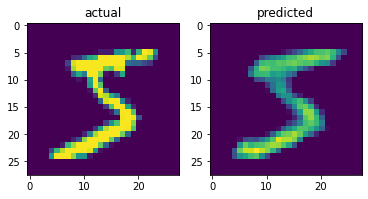

In [166]:
fig,ax = plt.subplots(ncols=2)
ax[0].imshow(imgs[0])
ax[0].set_title("actual")
ax[1].imshow(pred_images[0])
ax[1].set_title("predicted")

Now we can try clustering with our Autoencoder's featurized data. First we need to get the feature vectors for our data!

In order to get the predictions from the "latent space" of our model, we need to create a new Keras model to represent just the Encoder portion of the autencoder. This model will uses `input_layer` for the input and `enc_dense` for the output, since `enc_dense` is our "latent features" layer. If this is confusing, refer back to the `model.summary()` call which shows the full architecture of the model.

Our new model `latent_model` will help with getting the latent features. Note that we don't call `fit()` on this model. Since we are using the same layers that we used for our original `model`, the paramters for this subset of the model are already trained! We can simply call `latent_model.predict()` to get the feature vectors for our data.

In [167]:
latent_model = keras.Model(inputs=input_layer,outputs=enc_dense)
latent_features = latent_model.predict(imgs)
latent_features.shape

(4000, 16)

Now `latent_features` holds 16-dimensional feature vectors for each of our 4000 samples.
We can try clustering on these latent features to see how well the dimensionality reduction has worked!

Since we have ground-truth labels for this dataset, we can evaluate performance directly using these labels instead of using Silhouette score.

In [172]:
from sklearn.metrics import adjusted_rand_score

## Q14 [5 points]

Run a $k$-means clustering on `latent_features` using $k=10$, and record the labels as `img_clust_labels`.

Just as before, you can use the `KMeans` object from `scikit-learn` to do this for you.

In [175]:
#TODO: Q14
km_obj = KMeans(n_clusters=10)
img_clust_labels = km_obj.fit_predict(latent_features)

Now we will evaluate performance using adjusted rand index (ARI). ARI is a measure similar to accuracy, where larger values indicate better performance. An ARI of 1.0 indicates perfect (100%) accuracy, and a value close to 0 indicates 0% accuracy.

You can learn more about Adjusted Rand Index here: [ARI Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

In [176]:
print("ARI for CAE featurized MNIST: %0.3f" % adjusted_rand_score(img_clust_labels,labels))

ValueError: Found input variables with inconsistent numbers of samples: [4000, 392]

## Q15 [5 points]
How well did the AE model do on this dataset?

In [ ]:
# TODO: Answer Q15 here.
#the AE model did not do well based on the ARI 

Done! Save and submit your notebook on Canvas.